# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
print(data.head())
print('\nNull Analysis')
print(data.isnull().sum())

   transaction_date  house_age  transit_distance  local_convenience_stores  \
0          2012.917       32.0          84.87882                        10   
1          2012.917       19.5         306.59470                         9   
2          2013.583       13.3         561.98450                         5   
3          2013.500       13.3         561.98450                         5   
4          2012.833        5.0         390.56840                         5   

   latitude  longitude  price_per_unit  
0  24.98298  121.54024            37.9  
1  24.98034  121.53951            42.2  
2  24.98746  121.54391            47.3  
3  24.98746  121.54391            54.8  
4  24.97937  121.54245            43.1  

Null Analysis
transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

# Explatory Data Analysis

In [2]:
# Your code to explore data and train a regression model
import matplotlib.pyplot as plt

#categorical_data = data["local_convenience_stores"]
numeric_data = ["transit_distance","latitude","longitude"]
categorical_data = ["house_age","local_convenience_stores"]
all_num = data[numeric_data + ['price_per_unit']]
all_num.describe()


,transit_distance,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000
mean,1083.885689,24.969030,121.533361,37.980193
std,1262.109595,0.012410,0.015347,13.606488
min,23.382840,24.932070,121.473530,7.600000
25%,289.324800,24.963000,121.528085,27.700000
50%,492.231300,24.971100,121.538630,38.450000
75%,1454.279000,24.977455,121.543305,46.600000
max,6488.021000,25.014590,121.566270,117.500000


,house_age,local_convenience_stores
count,414.000000,414.000000
mean,17.712560,4.094203
std,11.392485,2.945562
min,0.000000,0.000000
25%,9.025000,1.000000
50%,16.100000,4.000000
75%,28.150000,6.000000
max,43.800000,10.000000


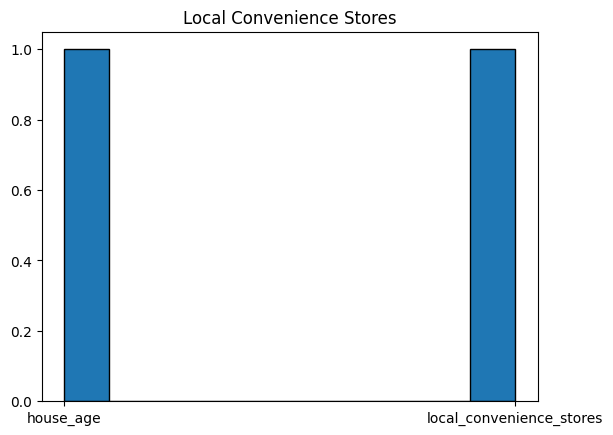

In [3]:
#categorical data
plt.hist(categorical_data,edgecolor='k')
plt.title('Local Convenience Stores')
data[categorical_data].describe()

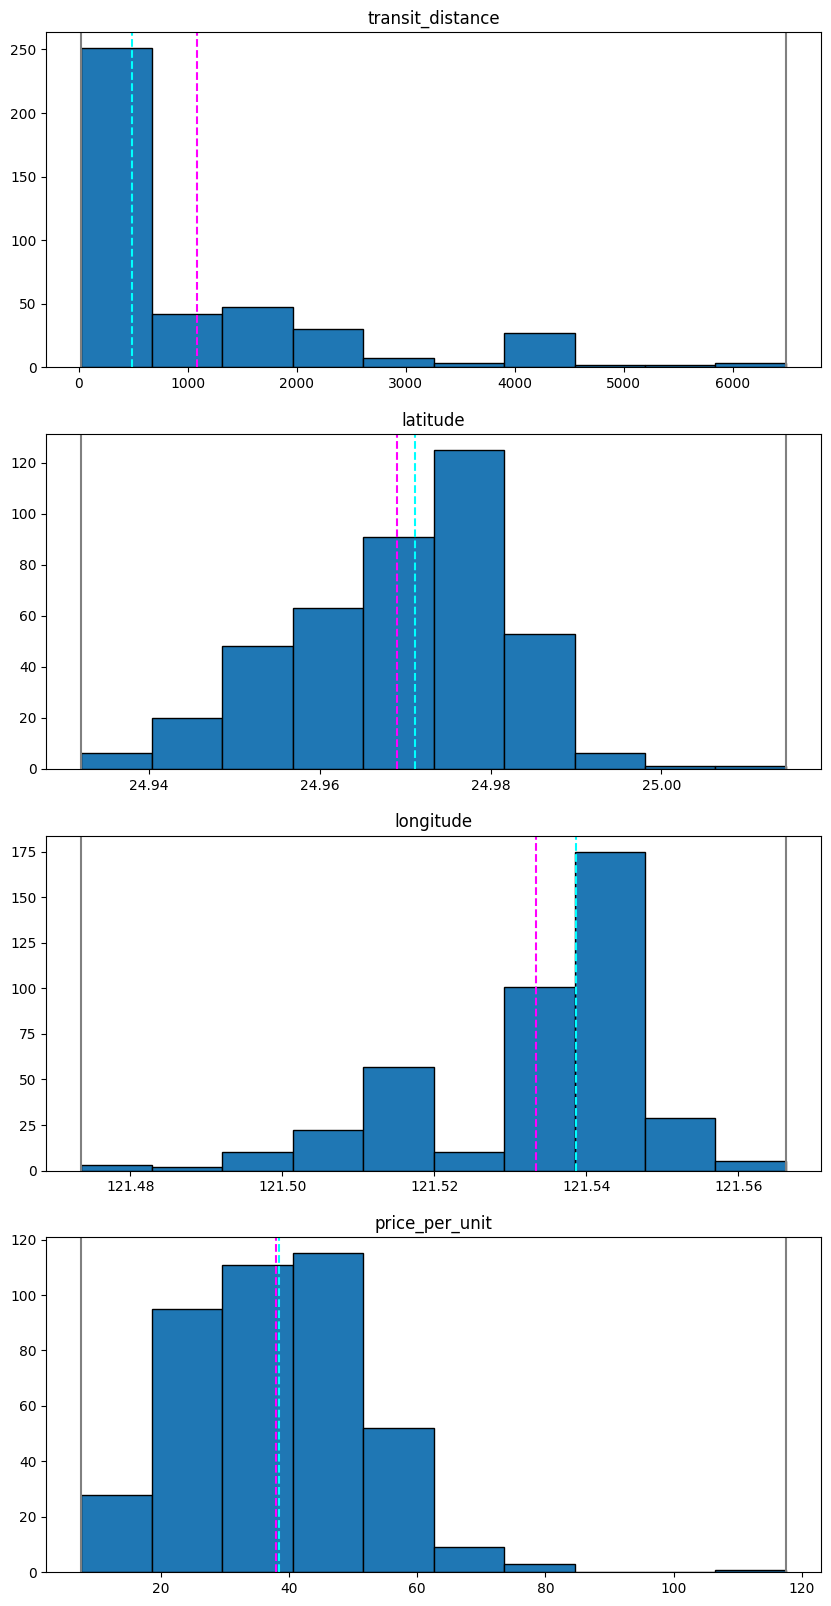

In [4]:
#numeric data
fig, ax = plt.subplots(4,1,figsize=(10,20))

#for i, col in enumerate:
#    print(data[col])
for i, col in enumerate(all_num.columns):
    all_num[col].hist(ax=ax[i],grid=False, edgecolor="k")
    ax[i].set_title(col)
    median = all_num[col].median()
    mean = all_num[col].mean()
    minimum,maximum = min(all_num[col]),max(all_num[col])
    ax[i].axvline(mean,linestyle='dashed',color='magenta')
    ax[i].axvline(median,linestyle='dashed',color='cyan')
    ax[i].axvline(minimum, color='grey')
    ax[i].axvline(maximum, color='grey')


# Building a Regression Model

### Split the data

Training and Test Data Set Created.
Number of Training rows:289.
Number of Test rows:125.


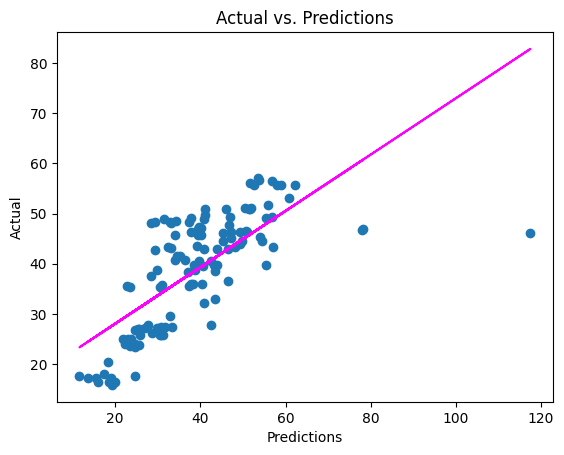

The model:GradientBoostingRegressor() 
MSE:102.27. 
RMSE:10.11. 
R2 Score:0.52.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X,y = data[numeric_data].values, data['price_per_unit'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
print(f"Training and Test Data Set Created.\nNumber of Training rows:{X_train.shape[0]}.\nNumber of Test rows:{X_test.shape[0]}.")

model = GradientBoostingRegressor().fit(X_train,y_train) #training the model
predictions = model.predict(X_test) # building predictions
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predictions)

plt.scatter(y_test,predictions)
plt.title("Actual vs. Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual")
#overlay regression line
z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color="magenta")
plt.show()

print(f'The model:{model} \nMSE:{round(mse,2)}. \nRMSE:{round(rmse,2)}. \nR2 Score:{round(r2,2)}.')

In [6]:
# optimizing the Gradient Boosting Regressor 
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
alg = GradientBoostingRegressor()
#The hyperparameters we can tune are the number of trees (n_estimators) and the learning rate - the scale of trees are determined by the 
# by the learning rate. 

params = {
    'learning_rate':[0.1,0.5,1],
    'n_estimators':[50,100,150]
}

score = make_scorer(r2_score)

gridsearch = GridSearchCV(alg,params, scoring=score,cv=3,return_train_score=True)
gridsearch.fit(X_train, y_train)

#print the best parameters
print(f'The best params are:\n{gridsearch.best_params_}',"\n")

#get the best model
model = gridsearch.best_estimator_

# since we have already trained the model, we just need to get the predictions and evaluate:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'The model:{model} \nMSE:{round(mse,2)}. \nRMSE:{round(rmse,2)}. \nR2 Score:{round(r2,2)}.')


The best params are:
{'learning_rate': 0.1, 'n_estimators': 50} 

The model:GradientBoostingRegressor(n_estimators=50) 
MSE:100.79. 
RMSE:10.04. 
R2 Score:0.53.


In [8]:
#prepocessing the data to try and improve accuracy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define preprocessing for numeric columns
numeric_features = [2,4,5]
categoric_features = [1,3]
numeric_transformer = Pipeline(
                                steps=
                                [('scaler',StandardScaler())]
                             )

# Define preprocessing for categorical columns
categoric_features = [1,3]
categoric_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown = 'ignore'))])

#combine steps 
preprocessor = ColumnTransformer(
    transformers =[
        ('num',numeric_transformer,numeric_features),
        ('cat',categoric_transformer, categoric_features)
    ])
# Prepare the pipeline
pipeline = Pipeline(steps = [('preprocessor',preprocessor),
                             ('regressor',GradientBoostingRegressor())])

model = pipeline.fit(X_train,y_train)


ValueError: all features must be in [0, 2] or [-3, 0]

# Creating the pipeline from scratch. 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numeric_features = [2,4,5]
numeric_transformer = Pipeline(steps=[('scaler',StandardScaler())])

categorical_features = [1,3]
categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformer = [
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ])

# create the pipeline 

pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('regressor',regressor)
])
model = pipeline.fit()

# tuning hyperparamters:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
# for gradient boosting, we can only tune n_estimators and learning_rate
params = {'n_estimators':[50,100,150],
          'learning_rate' = [0.1,0.2,0.3,0.5,0.7,1]}

score = make_scorer(r2_score)
alg = GradientBoostingRegressor()

# now you want to use the gridsearch to find the optimal values 
gridsearch = GridSearchCV(
    alg,
    params,
    scoring = score,
    cv = 3,
    return_train_score = True
)

gridsearch.fit(X_train, y_train)

# The best parameters are:
print(gridsearch.best_params_)

# The best model is called by using the arg best_estimator_

model = gridsearch.best_estimator_


In [17]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X,y = data[['transaction_date','house_age','transit_distance','local_convenience_stores','latitude','longitude']].values, data['price_per_unit'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
print(f"Training and Test Data Set Created.\nNumber of Training rows:{X_train.shape[0]}.\nNumber of Test rows:{X_test.shape[0]}.")


# tune model and then build a pipeline

params = {'n_estimators': [50,100,150],
          'learning_rate': [0.1, 0.2, 0.3, 0.5, 1]}

alg = GradientBoostingRegressor()
score = make_scorer(r2_score)
# now we want to use a grid search to fine the optimal values. 
gridsearch = GridSearchCV(
    alg,
    params,
    scoring = score,
    cv = 3,
    return_train_score = True
)
gridsearch.fit(X_train,y_train)

# print optimal parameters
gridsearch.best_params_

# print optimal model
model = gridsearch.best_estimator_

# Now let's build a pipeline to automate the process of preprocessing data 

# we need to identify the columns that have numeric and categorical data 
# numeric data
numeric_features = [2,4,5]
numeric_transformer = Pipeline(steps = [('scaler',StandardScaler())])

categorical_features = [1,3]
categorical_transformer = Pipeline(steps = [('onehot',OneHotEncoder(handle_unknown = 'ignore'))])

# combine the steps 
preprocessor = ColumnTransformer(
        transformers = [
            ('num',numeric_transformer,numeric_features),
            ('cat',categorical_transformer, categorical_features)
        ]
        )

# now we want to create a pipeline for the steps 
pipeline = Pipeline(steps = [('preprocessor',preprocessor),
                             ('regressor',GradientBoostingRegressor())])

# Model 
model = pipeline.fit(X_train,(y_train))
print('finished')

Training and Test Data Set Created.
Number of Training rows:289.
Number of Test rows:125.
finished


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
# save the model 
import joblib
filename = './rentals.pkl'
joblib.dump(model, filename)

new_data = {}

loaded_model = joblib.load(filename)
loaded_model.predict()
